In [25]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [16]:
st = 12345

In [5]:
df1 = pd.read_csv('IRIS.csv')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [7]:
get_info_dataframe(df1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

DATAFRAME MISSING INFO - 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64 

DATAFRAME SHAPE INFO - 

(150, 5)


In [9]:
df1['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df1['species'] = df1['species'].map({'Iris-setosa':0,\
                                     'Iris-versicolor':1,'Iris-virginica':2})

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
X = df1.drop(["species"],axis=1).values
y = df1["species"].values

In [15]:
scaler = StandardScaler()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,\
                                                    y, test_size=0.30,\
                                                    random_state=st)

In [18]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [22]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 4 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [23]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [26]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [27]:
train_network(model,optimizer,
              criterion,X_train,
              y_train,X_test,
              y_test,
              num_epochs,
              train_losses,
              test_losses)

Epoch 50/1000, Train Loss: 0.0613, Test Loss: 0.0564
Epoch 100/1000, Train Loss: 0.0531, Test Loss: 0.0537
Epoch 150/1000, Train Loss: 0.0496, Test Loss: 0.0586
Epoch 200/1000, Train Loss: 0.0474, Test Loss: 0.0492
Epoch 250/1000, Train Loss: 0.0466, Test Loss: 0.0503
Epoch 300/1000, Train Loss: 0.0459, Test Loss: 0.0443
Epoch 350/1000, Train Loss: 0.0460, Test Loss: 0.0529
Epoch 400/1000, Train Loss: 0.0456, Test Loss: 0.0437
Epoch 450/1000, Train Loss: 0.0455, Test Loss: 0.0423
Epoch 500/1000, Train Loss: 0.0455, Test Loss: 0.0417
Epoch 550/1000, Train Loss: 0.0614, Test Loss: 0.0590
Epoch 600/1000, Train Loss: 0.0458, Test Loss: 0.0450
Epoch 650/1000, Train Loss: 0.0455, Test Loss: 0.0426
Epoch 700/1000, Train Loss: 0.0454, Test Loss: 0.0422
Epoch 750/1000, Train Loss: 0.0451, Test Loss: 0.0416
Epoch 800/1000, Train Loss: 0.0448, Test Loss: 0.0414
Epoch 850/1000, Train Loss: 0.0446, Test Loss: 0.0420
Epoch 900/1000, Train Loss: 0.0444, Test Loss: 0.0427
Epoch 950/1000, Train Loss: 0

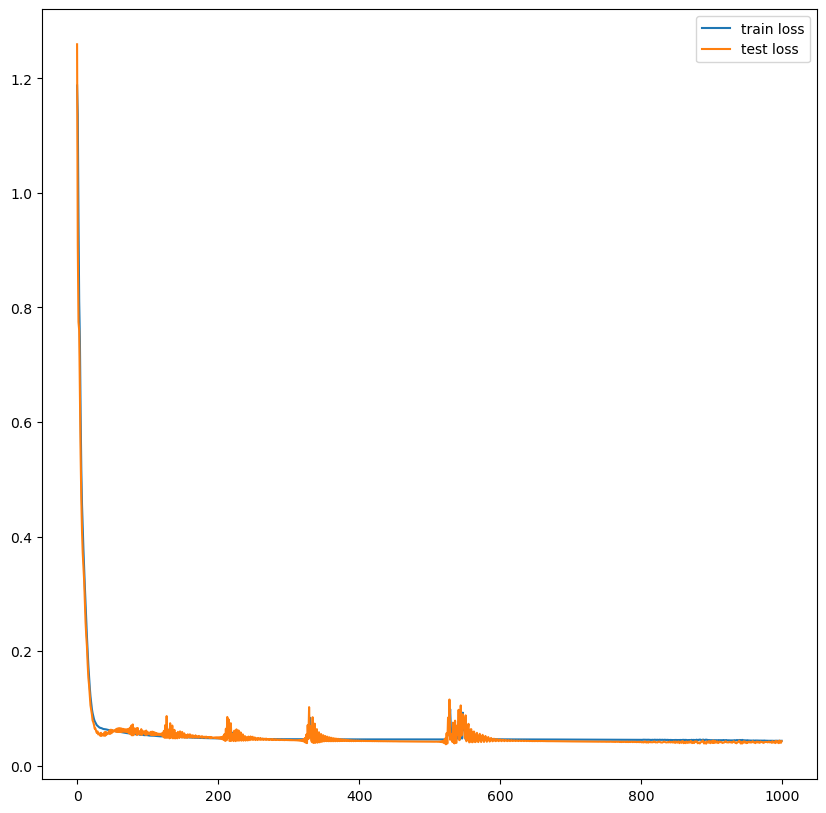

In [28]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [29]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [30]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [31]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [33]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 98.095
Test Accuracy: 97.778


In [34]:
import dvc